In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [2]:
pwd

'C:\\Users\\user\\OneDrive\\Desktop\\scatter-plotter'

In [3]:
cd C:\\Users\\user\\OneDrive\\Desktop\\CSV files

C:\Users\user\OneDrive\Desktop\CSV files


In [4]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
c_5=data.iloc[:,4]
c_5.head()



0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

In [6]:
c_15=data.iloc[:,14]
c_15.head()


0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [7]:
(data['gender']=='Male') & (data['SeniorCitizen']==1) & (data['PaymentMethod']=='Electronic check')

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [8]:
c_random=data[(data['gender']=='Male') & (data['SeniorCitizen']==1) & (data['PaymentMethod']=='Electronic check')]

In [9]:
c_random.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [10]:
data['tenure']>70 & (data['MonthlyCharges']>100)

0       True
1       True
2       True
3       True
4       True
        ... 
7038    True
7039    True
7040    True
7041    True
7042    True
Length: 7043, dtype: bool

In [11]:
data[data['tenure']>70 | (data['MonthlyCharges']>100)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No


In [12]:
total_tenure = data[(data['tenure']>70) | (data['MonthlyCharges']>100)]

In [13]:
total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [14]:
two_mail_yes = data[(data['Contract']=='Two year') & (data['PaymentMethod']=='Mailed check') & (data['Churn']=='Yes')]

In [15]:
two_mail_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [16]:
c_333 = data.sample(n=333)

In [17]:
c_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
1550,9957-YODKZ,Male,1,Yes,No,6,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.80,457.1,No
4397,7663-YJHSN,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),103.95,7556.9,No
3922,6173-GOLSU,Male,1,Yes,No,67,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),94.65,6079,No
2117,4139-DETXS,Female,0,Yes,Yes,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),64.45,4528,No


In [18]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [19]:
data['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [20]:
data['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [21]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [22]:
# visualization

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

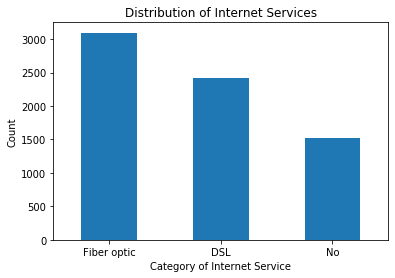

In [23]:
%matplotlib inline
alpha_color = 0.5
data['InternetService'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Internet Services')
plt.xlabel('Category of Internet Service')
plt.ylabel('Count')
plt.xticks(rotation = 0)

Text(0.5, 1.0, 'Distribution of tenure')

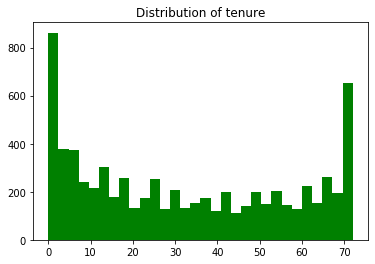

In [24]:
plt.hist(data['tenure'],bins = 30,color = 'green')
plt.title('Distribution of tenure')

Text(0.5, 1, 'Monthly charges vs tenure')

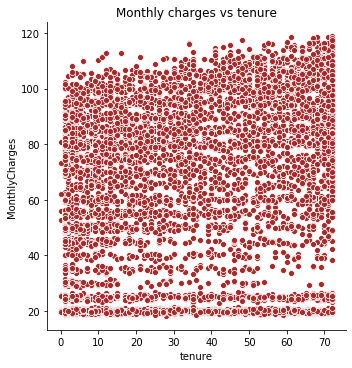

In [25]:
sns.relplot(x = 'tenure', y='MonthlyCharges', data = data,color = 'brown')
plt.title('Monthly charges vs tenure')

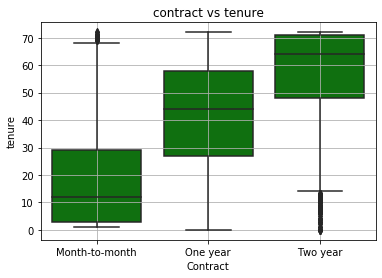

In [26]:
sns.boxplot(x = 'Contract', y='tenure', data = data,color = 'g')
plt.title('contract vs tenure')
plt.grid(True)

In [27]:
# making model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
y = data[['MonthlyCharges']]
x = data[['tenure']]

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 0)

In [30]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred = regressor.predict(x_test)
y_pred[:5],y_test[:5]

(array([[60.95089608],
        [72.98096699],
        [59.1903979 ],
        [55.66940154],
        [71.51388517]]),       MonthlyCharges
 2200           58.20
 4627          116.60
 3225           71.95
 2828           20.45
 3768           77.75)

In [32]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

29.394584027273893

In [35]:
# logistic regression
# feature is monthly charge
# target is churn
x = data[['MonthlyCharges']]
y = data[['Churn']]

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size  = 0.35,random_state = 0)

In [37]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

c:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_pred = log_model.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [40]:
confusion_matrix(y_test,y_pred),accuracy_score(y_test,y_pred)

(array([[1815,    0],
        [ 651,    0]], dtype=int64), 0.7360097323600974)

In [42]:
# multiple linear model by 2 independent values
x = data[['MonthlyCharges','tenure']]
y = data[['Churn']]

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size  = 0.20,random_state = 0)

In [44]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

c:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y_pred = log_model.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [47]:
confusion_matrix(y_test,y_pred),accuracy_score(y_test,y_pred)

(array([[935, 106],
        [211, 157]], dtype=int64), 0.7750177430801988)